In [1]:
#import all the dependencies
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import datetime
import matplotlib.patches as mpatches 
from matplotlib import font_manager as fm
import seaborn as sns
import gender_guesser.detector as gender
import scipy.stats as stats
import math

In [2]:
#read the file and store it in dataframe

starbucks=pd.read_csv("directory.csv")
starbucks=starbucks.dropna(axis=1, how='all')
starbucks=starbucks.drop(["Store Name","Street Address","Timezone","Phone Number"],axis=1)
starbucks["New_Country_Code"]=''
starbucks["Avg_Temp_celcius"]=''
starbucks.head()

,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius
0,Starbucks,47370-257954,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51,,
1,Starbucks,22331-212325,Licensed,Ajman,AJ,AE,NaN,55.47,25.42,,
2,Starbucks,47089-256771,Licensed,Ajman,AJ,AE,NaN,55.47,25.39,,
3,Starbucks,22126-218024,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,,
4,Starbucks,17127-178586,Licensed,Abu Dhabi,AZ,AE,NaN,54.54,24.51,,


In [3]:
#add the continent for each countries

with open('continent_country.json') as json_data:
    d = json.load(json_data)   
    
starbucks["Continent"]=starbucks["Country"].map(d)

#drop NA value for thr column "Continent"

starbucks=starbucks.dropna(subset=["Continent"]) 

# Starbucks stores have different types of ownership. 
Do they prefer to have certain type of ownership based on location across the globe?

In [4]:
starbucks_Lisence=starbucks.loc[starbucks["Ownership Type"]=="Licensed"]
starbucks_Joint_Venture=starbucks.loc[starbucks["Ownership Type"]=="Joint Venture"]
starbucks_Company_Owned=starbucks.loc[starbucks["Ownership Type"]=="Company Owned"]
starbucks_Franchise=starbucks.loc[starbucks["Ownership Type"]=="Franchise"]

starbucks_continent_l=starbucks_Lisence.groupby(["Continent"])["Store Number"].count()
starbucks_continent_j=starbucks_Joint_Venture.groupby(["Continent"])["Store Number"].count()
starbucks_continent_c=starbucks_Company_Owned.groupby(["Continent"])["Store Number"].count()
starbucks_continent_f=starbucks_Franchise.groupby(["Continent"])["Store Number"].count()


In [5]:
# list of continents
continents = list(starbucks_continent_l.index)

#list of group buckets
buckets = ["Licensed", "Franchised", "Joint Venture", "Company Owned"]
colors = ['blue','green',"yellow","red"]

# change groupby values to a dict
starbucks_l = starbucks_continent_l.to_dict()
starbucks_f = starbucks_continent_f.to_dict()
starbucks_c = starbucks_continent_c.to_dict()
starbucks_j = starbucks_continent_j.to_dict()

continents_df = pd.DataFrame(continents, columns=["Continent"])
# continents_df.set_index("Continent")

# create placehoders for buckets in dataframe for columns to be plotted
for b in buckets:
    continents_df[b] = ""

# need to make sure that all buckets (License, Franchsise, Joint Venture, and Company Owned) have a continent data, enter 0 fill no key found
for index, row in continents_df.iterrows():
    continents_df.loc[index, "Licensed"] = starbucks_l.get(row["Continent"], 0)
    continents_df.loc[index, "Franchised"] = starbucks_f.get(row["Continent"], 0)
    continents_df.loc[index, "Joint Venture"] = starbucks_j.get(row["Continent"], 0)
    continents_df.loc[index, "Company Owned"] = starbucks_c.get(row["Continent"], 0)
        
                  
continents_df





,Continent,Licensed,Franchised,Joint Venture,Company Owned
0,Africa,43,0,0,0
1,Asia,1866,0,3771,1859
2,Australia,46,0,0,0
3,Europe,705,317,204,647
4,North America,6405,0,0,9324
5,South America,307,0,1,102


In [6]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom', fontsize=12)



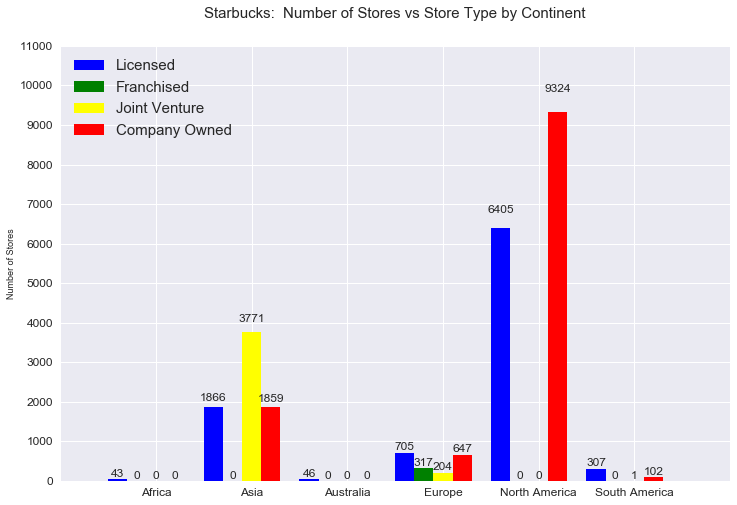

In [7]:
# set fontsize of labels
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

nbrContinents = len(continents_df["Continent"])
rects = []

x_axis = np.arange(0, nbrContinents)

fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111)

# plot each bucket that was grouped by stores
width = 0.20
offset = -(width*2)
for c, b in zip(colors, buckets):
    rects.append(ax.bar(x_axis+offset,continents_df[b],width=0.2, linewidth=2, color=c,align='center', label=b))
    offset += width
    
# set up tick values
ax.set_yticks(np.arange(0, 12000, 1000))
ax.set_xticks(np.arange(-1, nbrContinents+1))

# add label at the top of the bar
for r in rects:
    autolabel(r)

# setup tick labels; begin with a blank tiick label
xlabels = [""]
xlabels.extend(continents)

ax.set_xticklabels(xlabels)
ylbl = ax.set_ylabel("Number of Stores", fontsize=9)
title = ax.set_title("Starbucks:  Number of Stores vs Store Type by Continent", fontsize=15)
title.set_position([.5, 1.05])


plt.legend(loc="best", fontsize=15)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Store Type By Continent.png")

# Climatic impact on Starbucks stragegy of stores in certain place?
-Does Starbucks really favor to have stores in cold countries vs hot countries?

In [8]:
#Convert the country code to new format
    
with open('country.json') as json_data:
    c = json.load(json_data)   
    
starbucks["New_Country_Code"]=starbucks["Country"].map(c)

#drop NA value for thr column "Continent"

starbucks=starbucks.dropna(subset=["New_Country_Code"]) 

starbucks.head()

,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius,Continent
0,Starbucks,47370-257954,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51,AND,,Europe
1,Starbucks,22331-212325,Licensed,Ajman,AJ,AE,NaN,55.47,25.42,ARE,,Asia
2,Starbucks,47089-256771,Licensed,Ajman,AJ,AE,NaN,55.47,25.39,ARE,,Asia
3,Starbucks,22126-218024,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,ARE,,Asia
4,Starbucks,17127-178586,Licensed,Abu Dhabi,AZ,AE,NaN,54.54,24.51,ARE,,Asia


In [9]:
#collect
list_countries={}

for index,row in starbucks.iterrows():
    
    value=row["New_Country_Code"]
    
    if value not in list_countries.keys():
        
        url=("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/%s" %(value))
        response=req.get(url).json()
        Avg_temp=response[-1]["data"]
        starbucks.loc[index,"Avg_Temp_celcius"]=Avg_temp
        list_countries.update({value:Avg_temp})
        
    else:
        
        starbucks["Avg_Temp_celcius"]=starbucks["New_Country_Code"].map(list_countries)

In [10]:
# calculate temperature in Fahrenheit
starbucks["Fahrenheit"] = round(((starbucks['Avg_Temp_celcius']*9)/5 + 32), 0)
starbucks_Temp= starbucks.groupby(['Fahrenheit']).count()

starbucks.head()

,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius,Continent,Fahrenheit
0,Starbucks,47370-257954,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51,AND,9.627084,Europe,49.0
1,Starbucks,22331-212325,Licensed,Ajman,AJ,AE,NaN,55.47,25.42,ARE,28.020578,Asia,82.0
2,Starbucks,47089-256771,Licensed,Ajman,AJ,AE,NaN,55.47,25.39,ARE,28.020578,Asia,82.0
3,Starbucks,22126-218024,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,ARE,28.020578,Asia,82.0
4,Starbucks,17127-178586,Licensed,Abu Dhabi,AZ,AE,NaN,54.54,24.51,ARE,28.020578,Asia,82.0


In [11]:
def createbin(columnToBin, tableToUpdate, binlabels, nbrofbins, newBinColumnName, newCategoryColumnName):
    binRange = np.histogram(columnToBin, bins=nbrofbins, range=None, normed=False, weights=None)
    print(binRange[1])
    bins = binRange[1]
    # ageCategories = pd.cut(ByZip_df['Median Age'], len(ageGroup), labels=age_group)
    tableToUpdate[newCategoryColumnName] = pd.cut(columnToBin, len(binlabels), labels=binlabels)
    tableToUpdate[newBinColumnName] = pd.cut(columnToBin, bins)   

# bin length to be used for default
nbrofbins = 5

In [12]:
# create bins for temperature
group_names= np.arange(0,5)
createbin(starbucks['Fahrenheit'], starbucks, group_names, nbrofbins,'temperatureBinned','temperatureCategory')
starbucks.head(15)

[ 22.   34.4  46.8  59.2  71.6  84. ]


,Brand,Store Number,Ownership Type,City,State/Province,Country,Postcode,Longitude,Latitude,New_Country_Code,Avg_Temp_celcius,Continent,Fahrenheit,temperatureCategory,temperatureBinned
0,Starbucks,47370-257954,Licensed,Andorra la Vella,7,AD,AD500,1.53,42.51,AND,9.627084,Europe,49.0,2,"(46.8, 59.2]"
1,Starbucks,22331-212325,Licensed,Ajman,AJ,AE,NaN,55.47,25.42,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
2,Starbucks,47089-256771,Licensed,Ajman,AJ,AE,NaN,55.47,25.39,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
3,Starbucks,22126-218024,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
4,Starbucks,17127-178586,Licensed,Abu Dhabi,AZ,AE,NaN,54.54,24.51,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
5,Starbucks,17688-182164,Licensed,Abu Dhabi,AZ,AE,NaN,54.49,24.40,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
6,Starbucks,18182-182165,Licensed,Abu Dhabi,AZ,AE,NaN,54.49,24.40,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
7,Starbucks,23359-229184,Licensed,Abu Dhabi,AZ,AE,NaN,54.61,24.46,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
8,Starbucks,30781-99022,Licensed,Abu Dhabi,AZ,AE,NaN,55.69,24.19,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"
9,Starbucks,20423-205465,Licensed,Abu Dhabi,AZ,AE,NaN,54.38,24.48,ARE,28.020578,Asia,82.0,4,"(71.6, 84.0]"


In [14]:
temperature_group = starbucks.groupby("temperatureCategory")['Store Number'].count()
temperature_group
temperature_df = pd.DataFrame(temperature_group)
# print(list(temperature_df.index))

temperature_df


,Store Number
temperatureCategory,
0,1594
1,16455
2,4391
3,616
4,2541


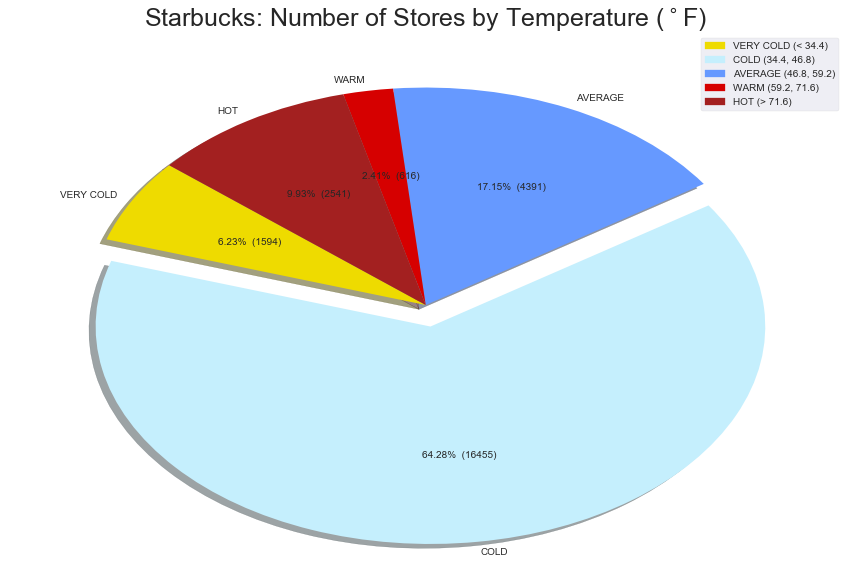

In [16]:
# add values and pct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Data to plot
colors = ['#EEDB00','#C5EFFD','#6699FF','#d60000','#a32020']
group_names= ["VERY COLD", "COLD", "AVERAGE", "WARM", "HOT"]
    
plt.figure(figsize=(15,10))
explode = (0.0, 0.1, 0.0, 0.0, 0.0)  # explode 1st slice
 

# # Plot
patch, texts, autotexts = plt.pie(temperature_df['Store Number'], explode=explode, labels=group_names, colors=colors, labeldistance=1.05,autopct=make_autopct(temperature_df['Store Number']), shadow=True, startangle=140)

# patch, texts, autotexts = plt.pie(age_df['Store Number'], labels=ageLabels, explode=explode, colors=colors, labeldistance=1.05, autopct=make_autopct(age_df['Store Number']), shadow=True, startangle=140)
templabels = ["VERY COLD (< 34.4)", "COLD (34.4, 46.8)", "AVERAGE (46.8, 59.2)", "WARM (59.2, 71.6)", "HOT (> 71.6)"]
handles, labels = ax.get_legend_handles_labels()
patches = []
for c, l in zip(colors, templabels):
    patches.append(mpatches.Patch(color=c, label=l))

plt.legend(handles=patches, frameon=True, loc="upper right")

    
proptease = fm.FontProperties()
proptease.set_size('small')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.title("Starbucks: Number of Stores by Temperature ($^\circ$F)", fontsize=25) 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores by Temperature.png")

# How is the sentiment for Starbuck over its competiors(Dunking Donuts and MCcafe)

In [ ]:
#Tweet analysis for the Starbucks Sentiment 

# Dependencies
import tweepy
import os
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

if os.path.isfile("apikey.csv"):
    key_df=pd.read_csv("apikey.csv")
    consumer_key=key_df.loc[0,'consumer_key']
    consumer_secret=key_df.loc[0,'consumer_secret']
    access_token=key_df.loc[0,'access_token']
    access_token_secret=key_df.loc[0,'access_token_secret']

else:
    consumer_key=input("Enter the consumer_key: ")
    consumer_secret=input("Enter the consumer_secret: ")
    access_token=input("Enter the access_token: ")
    access_token_secret=input("Enter the access_token_secret: ")
    data = [{'consumer_key': consumer_key,'consumer_secret':consumer_secret,'access_token':access_token,'access_token_secret':access_token_secret}]
    df = pd.DataFrame(data)
    df.to_csv('apikey.csv', index=False)
    print("file do not exist,creating..")

# Use Tweepy to Authenticate our access
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

compound_list1 = []
positive_list1 = []
negative_list1 = []
neutral_list1 = []

tweet_analyze=pd.DataFrame(columns=["User","Compound",'Positive','Negative','Neutral','Gender'])
tweet_comp=pd.DataFrame(columns=["Top_cafe","Compound",'Positive','Negative','Neutral'])


In [ ]:
searchlist=["#dunkindonuts","#starbucks",'#McCafe']

for items in searchlist:
 
    text_search=api.search(items,count=100)
    text_comment=text_search['statuses']
    
    for comment in text_comment:
        
        usertext1 = comment["text"]
        
        try:

            # Run Vader Analysis on each tweet
            compound1 = analyzer.polarity_scores(usertext1)["compound"]
            pos1 = analyzer.polarity_scores(usertext1)["pos"]
            neu1 = analyzer.polarity_scores(usertext1)["neu"]
            neg1 = analyzer.polarity_scores(usertext1)["neg"]

            #Entering the values in dataframe
            tweet_comp = tweet_comp.append([{"Top_cafe":items,
                                                 "Compound":compound1,
                                                 "Positive":pos1,
                                                 "Negative":neg1,
                                                 "Neutral":neu1
                                                }],ignore_index=True)

        except:
            print("no values")


In [ ]:
tweet_comp.head()

In [ ]:
t=datetime.date.today()

tweet_dunkin=tweet_comp.loc[(tweet_comp["Top_cafe"]=="#dunkindonuts")]
tweet_starbucks=tweet_comp.loc[(tweet_comp["Top_cafe"]=="#starbucks")]
tweet_mcafe=tweet_comp.loc[(tweet_comp["Top_cafe"]=="#McCafe")]


#plot the scatterplot

x_tweet_dunkin=np.arange(len(tweet_dunkin))
x_starbuck=np.arange(len(tweet_starbucks))
x_tweet_mcafe=np.arange(len(tweet_mcafe))

Dunkin=plt.scatter(x_tweet_dunkin,tweet_dunkin["Compound"],marker="o",facecolors="Red",edgecolors="black",s=100, alpha=.75,label="Dunkin")
Starbucks=plt.scatter(x_starbuck,tweet_starbucks["Compound"],marker="o",facecolors="Green",edgecolors="black",s=100, alpha=.75,label="Starbucks")
MCcafe=plt.scatter(x_tweet_mcafe,tweet_mcafe["Compound"],marker="o",facecolors="Yellow",edgecolors="black",s=100, alpha=.75,label="Mccafe")

#adding the text to axis and overall title
plt.title('Competiter Sentiment as for ' + str(t), fontsize=12)
plt.xlabel('Tweet Ago', fontsize=9)
plt.ylabel('Sentiment Polarity', fontsize=9)

#grid on
plt.grid()
#plot the legend out side
plt.legend(handles=[Dunkin,Starbucks,MCcafe], loc='center left', bbox_to_anchor=(1, 0.5))

#increase the plot size
plt.rcParams["figure.figsize"] = (15,15)

ax = plt.gca()
ax.set_facecolor('cornflowerblue')
ax.patch.set_alpha(0.1)
ax.set_xlim([0, 100])
#save the figure
plt.savefig('Sentiment_Analysis_Starbuck.png')
#show the plot
plt.show()


# Overall Sentiment for Starbucks

In [ ]:
tweet_count=[]

for i in range(0,5):
    
    i+=1
    
    # Query twitter for data. 
    text_target=api.search('#starbucks',count=100)
    user_target = text_target['statuses']
    #print("tweet",user_target)

    for tweet in user_target:

        try:

            user=tweet["user"]["name"]
            #print("user",user)
            first_name = user.split(' ')[0]
            usertext=tweet["text"]
            tweet_count.append(usertext)

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(usertext)["compound"]
            pos = analyzer.polarity_scores(usertext)["pos"]
            neu = analyzer.polarity_scores(usertext)["neu"]
            neg = analyzer.polarity_scores(usertext)["neg"]

            #Entering the values in dataframe
            tweet_analyze = tweet_analyze.append([{"User":first_name,
                                                 "Compound":compound,
                                                 "Positive":pos,
                                                 "Negative":neg,
                                                 "Neutral":neu
                                                }],ignore_index=True)


        except:
            print("No values")



tweet_analyze=tweet_analyze.dropna(subset=["User"])

tweet_analyze.head()

In [ ]:
postive_tweet=tweet_analyze["Positive"].mean()
Negative_tweet=tweet_analyze["Negative"].mean()
Neutral_tweet=tweet_analyze["Neutral"].mean()


# Labels for the sections of our pie chart
labels = ["Positive", "Negative", "Neutral"]

# The values of each section of the pie chart
sizes = [postive_tweet, Negative_tweet, Neutral_tweet]

# The colors of each section of the pie chart
colors = ["darkGreen", "red", "lightgreen"]

explode=[.5,0,0]
plt.pie(sizes,  labels=labels, colors=colors,autopct="%.2f", shadow=True, startangle=140,explode=explode)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.figure(figsize=(8,8))
# Prints our pie chart to the screen
plt.show()



## Is Starbucks more popular among male or female?

In [ ]:


name_detect = gender.Detector()
genders = []

for index,row in tweet_analyze.iterrows(): 
    name=row["User"].title()
    g=name_detect.get_gender(name)
    genders.append(g)
    
tweet_analyze["Gender"] = genders
tweet_analyze.head()

In [ ]:
male_tweet=tweet_analyze.loc[(tweet_analyze["Gender"]=="male") | (tweet_analyze["Gender"]=="mostly_male")]
male_tweet.head()

In [ ]:
female_tweet=tweet_analyze.loc[(tweet_analyze["Gender"]=="female") | (tweet_analyze["Gender"]=="mostly_female")]


In [ ]:
#plot the scatterplot
x_male=np.arange(len(male_tweet))
x_female=np.arange(len(female_tweet))

Male=plt.scatter(x_male,male_tweet["Compound"],marker="o",facecolors="Blue",edgecolors="black",s=100, alpha=1,label="Male")
Female=plt.scatter(x_female,female_tweet["Compound"],marker="o",facecolors="Red",edgecolors="black",s=100, alpha=1,label="Female")


In [ ]:
#time stamp for title
import datetime
t=datetime.date.today()

In [ ]:
#adding the text to axis and overall title
plt.title('Tweet Sentiment as of ' + str(t), fontsize=12)
plt.xlabel('Tweet Ago', fontsize=9)
plt.ylabel('Tweet Sentiment Polarity', fontsize=9)

#grid on
plt.grid()
#plot the legend out side
plt.legend(handles=[Male,Female], loc='center left', bbox_to_anchor=(1, 0.5))

#increase the plot size
plt.rcParams["figure.figsize"] = (10,8)

ax = plt.gca()
ax.set_facecolor('cornflowerblue')
ax.patch.set_alpha(0.1)
ax.set_xlim([0, 75])
#save the figure
plt.savefig('Sentiment_Analysis_Starbuck.png')
#show the plot
plt.show()


In [ ]:
overall_mean=tweet_analyze["Compound"].mean()
# Run 1-Sample T-Test
stats.ttest_1samp(a=male_tweet["Compound"], popmean=overall_mean)



In [ ]:
stats.ttest_1samp(a=female_tweet["Compound"], popmean=overall_mean)

In [ ]:
# Run 2-Sample T-Test

stats.ttest_ind(female_tweet["Compound"], male_tweet["Compound"], equal_var=False)